Project 1: Stroop effect
========================

1. What is our independent variable? What is our dependent variable?
------------------------------------------

_independent variable_: word's condition (congruent or incongruent)

_dependent variable_: time it takes to read a list

2. What is an appropriate hypothesis for this task? What kind of statistical test do you expect to perform? Justify your choices.
------------------

($H_0$) _0-hypothesis_: mean time of reading is equal for congruent and incongruent lists ($\mu_c = \mu_i$)

($H_1$) _alternative_: mean time of reading incongruent list is greater than mean time of reading congruent list ($\mu_c < \mu_i$)

Note: I decided to use one-tailed test after reading the [description](https://en.wikipedia.org/wiki/Stroop_effect) 

I will use [Student's t-test for the paired samples](https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples) because every participant read list for each condition (congruent and incongruent), so we have pairs of similar units and need to verify statistically is there a difference between the results for these paired groups.

In [68]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df_path = r'~/Documents/PycharmProjects/udacity_project/Project1_Stroop_effect/stroopdata.csv'
df = pd.read_csv(df_path)
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
--------

In [70]:
print df.describe()

       Congruent   Incongruent
count  24.000000     24.000000
mean   14.051125     22.015917
std     3.559358      4.797057
min     8.630000     15.687000
25%    11.895250     18.716750
50%    14.356500     21.017500
75%    16.200750     24.051500
max    22.328000     35.255000


4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
--------------------

Populating the interactive namespace from numpy and matplotlib


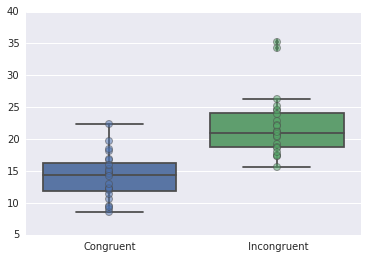

In [71]:
%pylab inline

sns.boxplot(data=df)
sns.stripplot(data=df, edgecolor="gray", alpha=0.5)

_Here we can graphically see, that mean value of Incongruent group larger than in Congruent group, so alternative hypothesis seems meaningful. On boxplots medians are shown, but as we can see on the dotplots - outliers of the Incongruent set will only make mean of this group larger._

Populating the interactive namespace from numpy and matplotlib


count    24.000000
mean     -7.964792
std       4.864827
min     -21.919000
25%     -10.258500
50%      -7.666500
75%      -3.645500
max      -1.950000
Name: Diff, dtype: float64

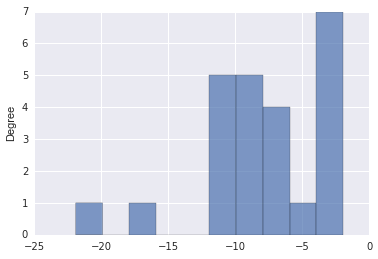

In [72]:
# df.head()
df['Diff'] = df['Congruent'] - df[' Incongruent']
df.head()
%pylab inline

plt.figure()
df['Diff'].plot(kind='hist', bins=10, alpha=0.7)
df['Diff'].describe()

_Here is a histogram of the difference. All values are below 0 with mean value around -8.0. Even from this observation we can assume, that it is very likely, that we will obtain statistically significant result (diffenerce)._

5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
----------

In [80]:
print 'confidence level: 99%'
print 't-statistic: t =',sp.stats.ttest_rel(df['Congruent'], df[' Incongruent'], axis=0)[0]
print 'two tailed p-value: p =',sp.stats.ttest_rel(df['Congruent'], df[' Incongruent'], axis=0)[1]
print 'one tailed p-value: p =',sp.stats.ttest_rel(df['Congruent'], df[' Incongruent'], axis=0)[1]/2

Confidence level: 99%
t-statistic: t = -8.02070694411
two tailed p-value: p = 4.10300058571e-08
one tailed p-value: p = 2.05150029286e-08


_scipy.stats.ttest_rel performs two-tailed t-test for the related samples and, (due to [this discussion](http://scipy-user.10969.n7.nabble.com/scipy-stats-one-sided-two-sided-less-greater-signed-td3730.html#a31795926)), p-value for the one-sided test is **p = 2.05150029286e-08**. Nevertheless, p-value is so tiny, that it is obvious that we will **reject null (even for significance level of $\alpha = 0.01$ (confidence level 99%)). That is - there is a significant difference between mean time of reading congruent and incongruent lists, we are 99% confident, that reading of incongruent list takes on average from 5.187 to 10.743 second more, than reading congruent list**. As it was said previously, it was easy to see from difference data set that we will obtain such result._

6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!
---------

As it was said in [this page](https://faculty.washington.edu/chudler/words.html#seffect) in section "why?" that our perception of information - ability to read - causes the problem. Also there are some variants of tests. As a read them, it is hard for me now to imagine something new. But I've heard about one test, that can be done by children much faster, than by adults (so here we would've done test for independent samples). Maybe it is not the thing that you ask, but I will share anyway:

we have rows of numbers and some kind of 'result' for these rows. We have to figure out last result:

1 2 8 3 - 2

4 6 9 2 - 2

4 5 2 7 - 0

8 1 9 8 - 5

3 4 7 9 - 1

3 8 6 1 - ?

Links
=====

1. [t-test for paired samples, wiki](https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples)
2. [scipy.stats.ttest_rel doc](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_rel.html)
3. [one sided ttest_rel?](http://scipy-user.10969.n7.nabble.com/scipy-stats-one-sided-two-sided-less-greater-signed-td3730.html#a31795926)
4. [visualization, stackoverflow](http://stackoverflow.com/questions/23519135/dot-boxplots-from-dataframes)
5. [ipython markdown doc](http://daringfireball.net/projects/markdown/syntax)

calculation of confidence interval was done in R - std(), mean(), qt() functions.